In [33]:
from Preprocessing import Preprocessing
ps = Preprocessing()

images = ['img/a0.png', 'img/a1.png']
results = ps.do_it(images)
print('Puzzles: {}'.format(len(results)))

Files: 2
Puzzles: 54


In [34]:
import numpy as np

def get_category(d, borders, i):
    cat = ''
    up,down,left,right = borders
    
    if np.std(up[:,0]) > 10.0 and np.min(up[:,0]) < 120:
        cat += 'M'
    elif np.std(up[:,0]) > 10.0 and np.max(up[:,0]) > 280:
        cat += 'F'
    elif np.std(up[:,0]) < 10.0:
        cat += 'N'
    else:
        if np.min(up[:,0]) < np.mean(up[:,0]):
            cat += 'M'
        else:
            cat += 'F'
        
    if np.std(down[:,0]) > 10.0 and np.max(down[:,0]) > 880:
        cat += 'M'
    elif np.std(down[:,0]) > 10.0 and np.min(down[:,0]) < 720:
        cat += 'F'
    elif np.std(down[:,0]) < 10.0:
        cat += 'N'
    else:
        if np.max(down[:,0])> np.mean(down[:,0]):
            cat += 'M'
        else:
            cat += 'F'        
    
    if np.std(left[:,1]) > 10.0 and np.min(left[:,1]) < 120:
        cat += 'M'
    elif np.std(left[:,1]) > 10.0 and np.max(left[:,1]) > 280:
        cat += 'F'
    elif np.std(left[:,1]) < 10.0:
        cat += 'N'
    else:
        if np.min(left[:,1])< np.mean(left[:,1]):
            cat += 'M'
        else:
            cat += 'F'
            
    if np.std(right[:,1]) > 10.0 and np.max(right[:,1]) > 880:
        cat += 'M'
    elif np.std(right[:,1]) > 10.0 and np.min(right[:,1]) < 720:
        cat += 'F'
    elif np.std(right[:,1]) < 10.0:
        cat += 'N'
    else:
        if np.max(right[:,1])> np.mean(right[:,1]):
            cat += 'M'
        else:
            cat += 'F'
        
    if cat in d:
        d[cat].append(i)
    else:
        d[cat] = [i]
        
    return cat

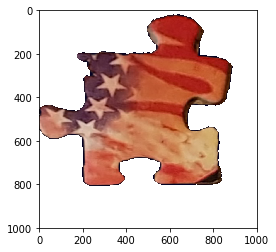

MFMF 0


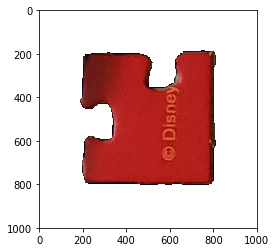

FNFN 1


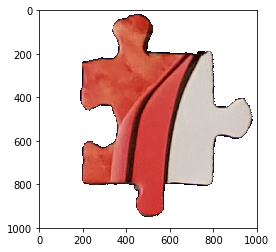

MMFM 2


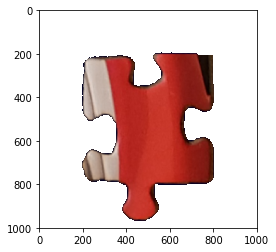

FMFF 3


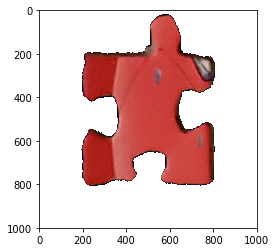

MFFF 4


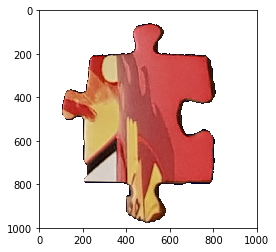

MMMF 5


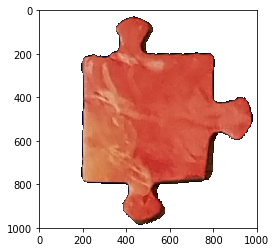

MMNM 6


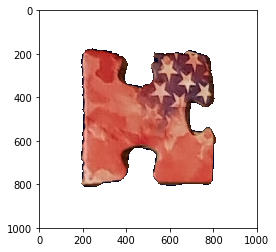

FFNF 7


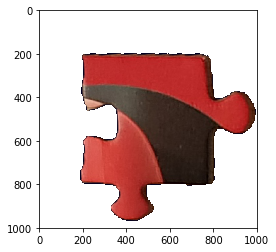

NMFM 8


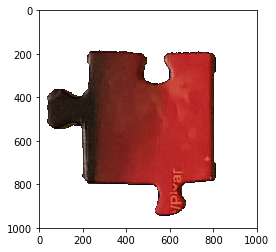

FMMN 9


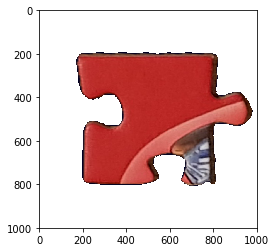

NFFM 10


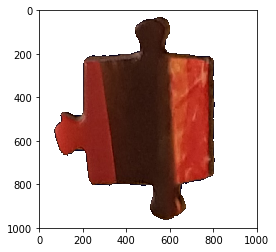

MMMN 11


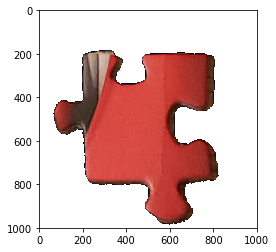

FMMF 12


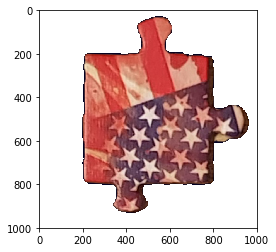

MMNM 13


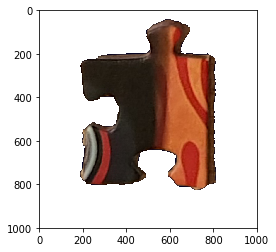

MFFN 14


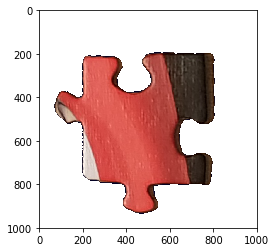

FMMF 15


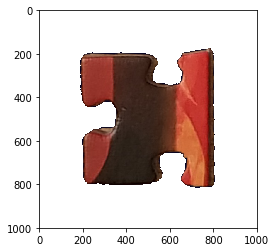

FFFN 16


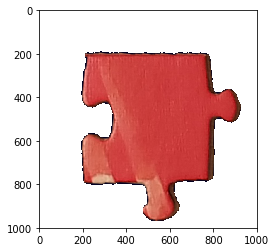

NMFM 17


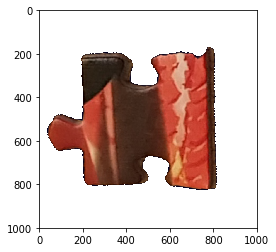

FFMN 18


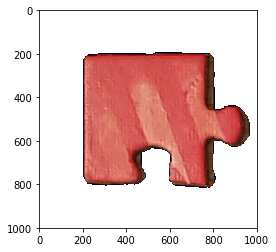

NFNM 19


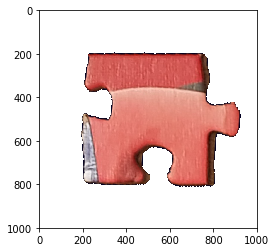

NFFM 20


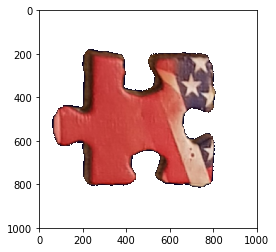

FFMF 21


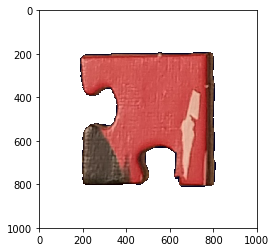

NFFN 22


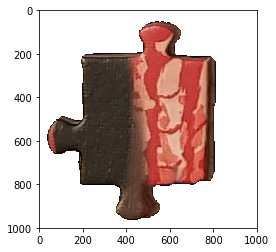

MMMN 23


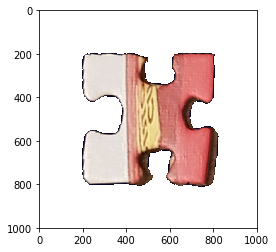

FFFF 24


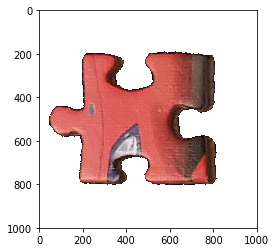

FFMF 25


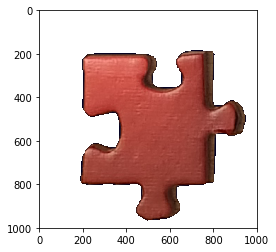

FMFM 26


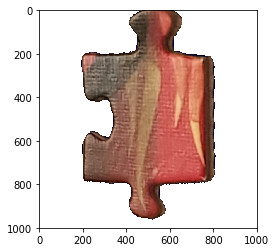

MMFN 27


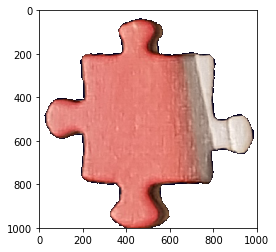

MMMM 28


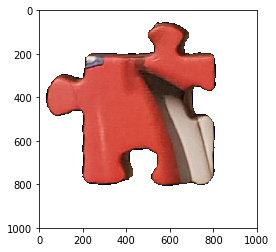

MFMF 29


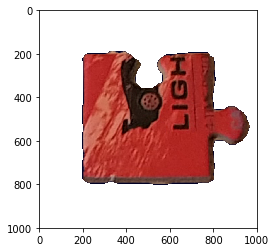

FNNM 30


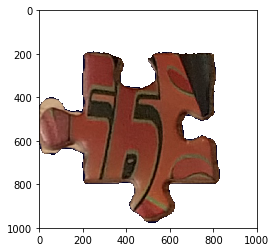

FMMF 31


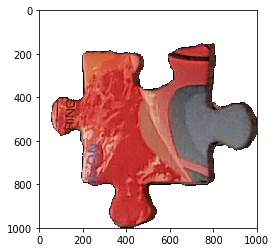

FMMM 32


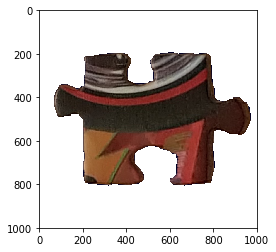

FFMM 33


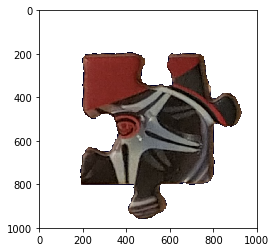

FMFM 34


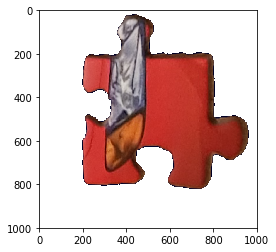

MFFM 35


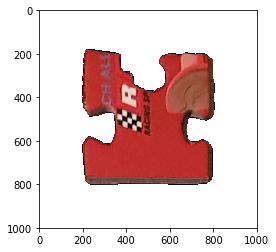

FNFF 36


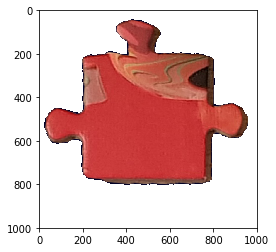

MNMM 37


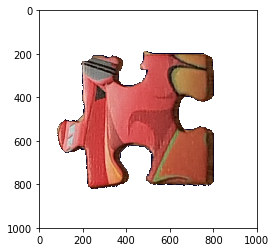

FFMF 38


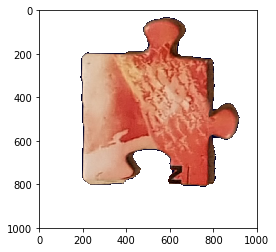

MFNM 39


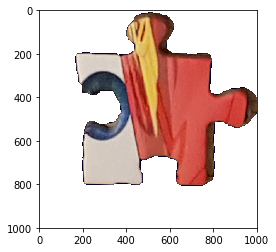

MFFM 40


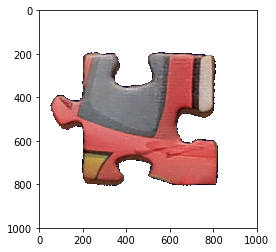

FFMF 41


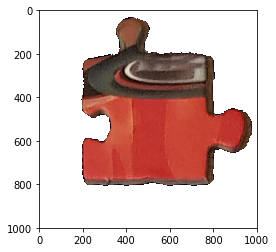

MNFM 42


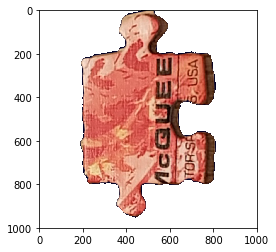

MMNF 43


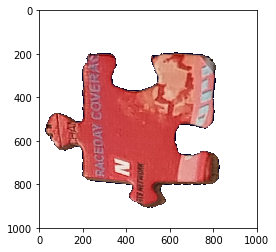

FMMF 44


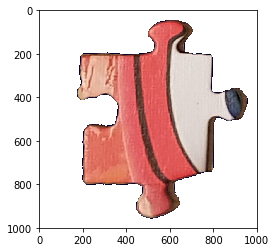

MMFM 45


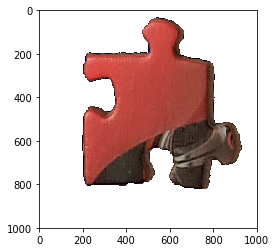

MFFM 46


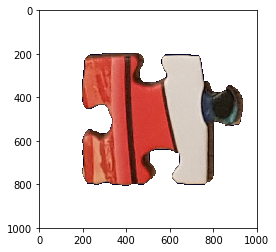

FFFM 47


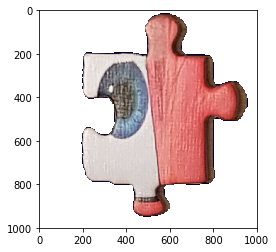

MMFM 48


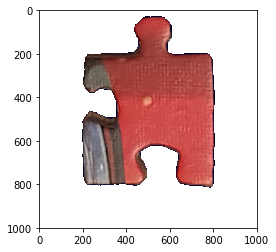

MFFN 49


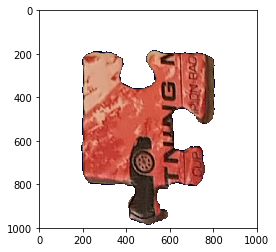

FMNF 50


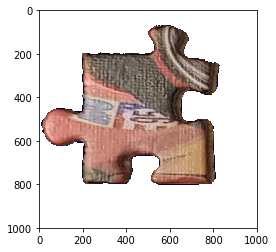

MFMF 51


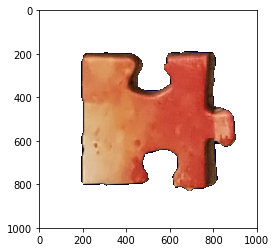

FFNM 52


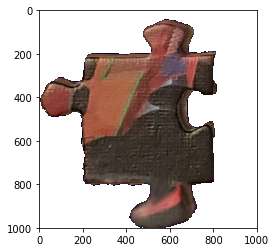

MMMF 53


In [117]:
d = {}
for i, (img, borders) in enumerate(results):
    ps.draw(img[0])
    print(get_category(d, borders, i), i)

In [36]:
d

{'MFMF': [0, 29, 51],
 'FNFN': [1],
 'MMFM': [2, 45, 48],
 'FMFF': [3],
 'MFFF': [4],
 'MMMF': [5, 53],
 'MMNM': [6, 13],
 'FFNF': [7],
 'NMFM': [8, 17],
 'FMMN': [9],
 'NFFM': [10, 20],
 'MMMN': [11, 23],
 'FMMF': [12, 15, 31, 44],
 'MFFN': [14, 49],
 'FFFN': [16],
 'FFMN': [18],
 'NFNM': [19],
 'FFMF': [21, 25, 38, 41],
 'NFFN': [22],
 'FFFF': [24],
 'FMFM': [26, 34],
 'MMFN': [27],
 'MMMM': [28],
 'FNNM': [30],
 'FMMM': [32],
 'FFMM': [33],
 'MFFM': [35, 40, 46],
 'FNFF': [36],
 'MNMM': [37],
 'MFNM': [39],
 'MNFM': [42],
 'MMNF': [43],
 'FFFM': [47],
 'FMNF': [50],
 'FFNM': [52]}

In [37]:
from Solver import Solver

sol = Solver()

In [38]:
sol.solve(d)

TypeError: solve() takes 1 positional argument but 2 were given

In [39]:
# ABCD
# DABC
# CDAB
# BCDA

In [40]:
new_d = {}
for key in d.keys():
    if key in new_d:
        new_d[key].append(d[key])
    elif ''.join(key[-1]+key[:-1]) in new_d:
        new_d[''.join(key[-1]+key[:-1])].append(d[key])
    elif ''.join(key[-2]+key[:-2]) in new_d:
        new_d[''.join(key[-1]+key[:-1])].append(d[key])
    elif ''.join(key[-3]+key[:-3]) in new_d:
        new_d[''.join(key[-1]+key[:-1])].append(d[key])
    else:
        new_d[key] = [d[key]]
        
new_d

{'MFMF': [[0, 29, 51], [26, 34]],
 'FNFN': [[1]],
 'MMFM': [[2, 45, 48]],
 'FMFF': [[3], [4]],
 'MMMF': [[5, 53]],
 'MMNM': [[6, 13], [37]],
 'FFNF': [[7], [36]],
 'NMFM': [[8, 17]],
 'FMMN': [[9], [43]],
 'NFFM': [[10, 20], [18]],
 'MMMN': [[11, 23]],
 'FMMF': [[12, 15, 31, 44]],
 'MFFN': [[14, 49], [52]],
 'FFFN': [[16]],
 'NFNM': [[19]],
 'FFMF': [[21, 25, 38, 41]],
 'NFFN': [[22]],
 'FFFF': [[24]],
 'MMFN': [[27], [39]],
 'MMMM': [[28]],
 'FNNM': [[30]],
 'FMMM': [[32]],
 'FFMM': [[33]],
 'MFFM': [[35, 40, 46]],
 'MNFM': [[42]],
 'FFFM': [[47]],
 'FMNF': [[50]]}

In [41]:
for key in new_d.keys():
    new_d[key] = list(set([item for sublist in new_d[key] for item in sublist]))
    
new_d

{'MFMF': [0, 34, 51, 26, 29],
 'FNFN': [1],
 'MMFM': [48, 2, 45],
 'FMFF': [3, 4],
 'MMMF': [53, 5],
 'MMNM': [37, 13, 6],
 'FFNF': [36, 7],
 'NMFM': [8, 17],
 'FMMN': [9, 43],
 'NFFM': [10, 18, 20],
 'MMMN': [11, 23],
 'FMMF': [12, 31, 44, 15],
 'MFFN': [49, 52, 14],
 'FFFN': [16],
 'NFNM': [19],
 'FFMF': [25, 21, 38, 41],
 'NFFN': [22],
 'FFFF': [24],
 'MMFN': [27, 39],
 'MMMM': [28],
 'FNNM': [30],
 'FMMM': [32],
 'FFMM': [33],
 'MFFM': [40, 35, 46],
 'MNFM': [42],
 'FFFM': [47],
 'FMNF': [50]}

In [42]:
N = [] #narozniki
K = [] #wszystkie mozliwosci dla naroznikow i krawedzi (minimum 1 N)
for key in new_d.keys():    
    if key.count('N') == 2:
        N.append(key)
    if key.count('N') == 1:
        K.append(key)
        
N = list(set(N))
K = list(set(K))

In [43]:
img, borders = results[new_d[N[0]][0]]
up,down,left,right = borders

In [95]:
def get_separability(edge, im, edgeType):
    dlugosc = len(edge)//5
    nasz_img = [[],[],[],[],[]]
    
    if edgeType == 'up':
        paddingY1, paddingY2, paddingX1, paddingX2 = 15, 35, 0, 1
    elif edgeType == 'down':
        paddingY1, paddingY2, paddingX1, paddingX2 = -35, -15, 0, 1
    elif edgeType == 'left':
        paddingY1, paddingY2, paddingX1, paddingX2 = 0, 1, 15, 35
    elif edgeType == 'right':
        paddingY1, paddingY2, paddingX1, paddingX2 = 0, 1, -35, -15
    
    for i,(y,x) in enumerate(edge):
        if i < dlugosc:
            nasz_img[0].append(im[y+paddingY1:y+paddingY2, x+paddingX1:x+paddingX2])
        elif i < 2*dlugosc:
            nasz_img[1].append(im[y+paddingY1:y+paddingY2, x+paddingX1:x+paddingX2])
        elif i < 3*dlugosc:
            nasz_img[2].append(im[y+paddingY1:y+paddingY2, x+paddingX1:x+paddingX2])
        elif i < 4*dlugosc:
            nasz_img[3].append(im[y+paddingY1:y+paddingY2, x+paddingX1:x+paddingX2])
        else:
            nasz_img[4].append(im[y+paddingY1:y+paddingY2, x+paddingX1:x+paddingX2])
    whole_mean = np.mean([item for sublist in nasz_img for item in sublist])
    region1_mean = np.mean(nasz_img[0])
    region2_mean = np.mean(nasz_img[1])
    region3_mean = np.mean(nasz_img[2])
    region4_mean = np.mean(nasz_img[3])
    region5_mean = np.mean(nasz_img[4])

    upMean = (dlugosc*(region1_mean-whole_mean)**2+dlugosc*(region2_mean-whole_mean)**2+dlugosc*(region3_mean-whole_mean)**2+dlugosc*(region4_mean-whole_mean)**2+dlugosc*(region5_mean-whole_mean)**2)
    region_std = ((dlugosc - whole_mean)**2)*5
    
    return upMean/region_std

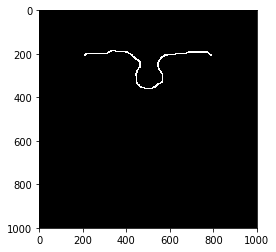

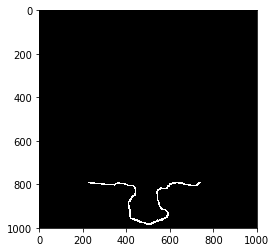

0.7707474735807892 0.5689852226138608
25.18086391143976


In [137]:
import cv2
import matplotlib.pyplot as plt

img, borders = results[30]
up,down,left,right = borders
img2, borders2 = results[50]
up2,down2,left2,right2 = borders2

im = img[0].copy()
im2 = img2[0].copy()
upEdge = 1 - get_separability(up, im, 'up')
rightEdge = 1 - get_separability(down2, im2, 'down')
imT = np.zeros((1000, 1000), dtype=np.uint8)
imT2 = np.zeros((1000, 1000), dtype=np.uint8)
for i in up:
    imT[i[0], i[1]] = 255
ps.draw(imT)
for i in down2:
    imT2[i[0], i[1]] = 255
ps.draw(imT2)
print(upEdge, rightEdge)
print(cv2.matchShapes(up, (down2), 1, 0.0))
# ilosc_pikseli_w_regionie * (srednia_regionu - srednia_calosci) ^2
# (piksele_w_regionie - srednia_calosci) ^2


In [67]:
print(len(nasz_img[4]))
# print(len(nasz_img))
# # for el in nasz_img:
# #     ps.draw(el)

1584


In [46]:
K

['FFNF',
 'MMNM',
 'FFFN',
 'MMFN',
 'NFFM',
 'FMMN',
 'FMNF',
 'MMMN',
 'MFFN',
 'NMFM',
 'MNFM']

In [47]:
# jeśli jest 2xN -> musi być 1 N
# jeśli jest MMMM -> musi być 1 F
# jeśli jest FFFF -> musi być 1 M